# **1. Problem Statement**

Stack Overflow, a popular Q&A site for programmers, hosts millions of technical questions, each labeled with tags such as python, java, web-development, etc. Manually tagging these questions is error-prone and time-consuming.

Objective: Build a machine learning model that can automatically predict the appropriate tags for a question based on its title and body. This will:

- Improve searchability

- Enhance content categorization

- Reduce manual effort


# **2.  Data Collection**

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup

API_KEY = "rl_EiCiFvJjADdLpS7tjeEwSeVkQ"
TAGS = ["python", "machine-learning", "deep-learning"]
MAX_PAGES = 100
PAGE_SIZE = 100

all_data = []
page = 1

while page <= MAX_PAGES:
    print(f"Fetching page {page}...")

    url = "https://api.stackexchange.com/2.3/questions"
    params = {
        "page": page,
        "pagesize": PAGE_SIZE,
        "order": "desc",
        "sort": "votes",
        "site": "stackoverflow",
        "filter": "withbody",
        "tagged": ";".join(TAGS),
        "key": API_KEY
    }

    response = requests.get(url, params=params)
    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        break

    data = response.json()
    items = data.get("items", [])

    for item in items:
        title = item.get("title", "")
        body_html = item.get("body", "")
        tags = item.get("tags", [])
        body_text = BeautifulSoup(body_html, "html.parser").get_text()

        if title.strip() and body_text.strip() and tags:
            all_data.append({
                "title": title.strip(),
                "body": body_text.strip(),
                "tags": ",".join(tags)
            })

    if not data.get("has_more", False):
        break

    page += 1
    time.sleep(1)

# Save to CSV
df = pd.DataFrame(all_data)
if df.empty:
    print("⚠️ No data fetched.")
else:
    df.to_csv("stackoverflow_tagged_questions.csv", index=False)
    print(f"✅ Saved {len(df)} questions to stackoverflow_tagged_questions.csv")


Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Fetching page 33...
Fetching page 34...
Fetching page 35...
✅ Saved 3422 questions to stackoverflow_tagged_questions.csv


In [ ]:
data=pd.read_csv("/content/stackoverflow_tagged_questions.csv")
data

,title,body,tags
0,How do I print the model summary in PyTorch?,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,What does model.eval() do in pytorch?,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,How do I initialize weights in PyTorch?,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,What does model.train() do in PyTorch?,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,RuntimeError: Input type (torch.FloatTensor) a...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,Is there any python library or API for Deep Le...,I need to do some deep learning work in python...,"python,machine-learning,tensorflow,deep-learning"
3418,Error: (-215:Assertion failed) !ssize.empty() ...,I am getting the error:\nTraceback (most recen...,"python,opencv,machine-learning,deep-learning,a..."
3419,Will it lead to Overfitting / Curse of Dimensi...,Dataset contains :\n15000 Observations/Rows\n3...,"python,machine-learning,deep-learning,dataset,..."
3420,How to predict the household water consumption...,I have data related to the household water con...,"python,machine-learning,deep-learning"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3422 non-null   object
 1   body    3422 non-null   object
 2   tags    3422 non-null   object
dtypes: object(3)
memory usage: 80.3+ KB


In [ ]:
data

,title,body,tags
0,How do I print the model summary in PyTorch?,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,What does model.eval() do in pytorch?,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,How do I initialize weights in PyTorch?,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,What does model.train() do in PyTorch?,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,RuntimeError: Input type (torch.FloatTensor) a...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,Is there any python library or API for Deep Le...,I need to do some deep learning work in python...,"python,machine-learning,tensorflow,deep-learning"
3418,Error: (-215:Assertion failed) !ssize.empty() ...,I am getting the error:\nTraceback (most recen...,"python,opencv,machine-learning,deep-learning,a..."
3419,Will it lead to Overfitting / Curse of Dimensi...,Dataset contains :\n15000 Observations/Rows\n3...,"python,machine-learning,deep-learning,dataset,..."
3420,How to predict the household water consumption...,I have data related to the household water con...,"python,machine-learning,deep-learning"


In [ ]:
datac = data.copy()
datac

,title,body,tags
0,How do I print the model summary in PyTorch?,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,What does model.eval() do in pytorch?,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,How do I initialize weights in PyTorch?,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,What does model.train() do in PyTorch?,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,RuntimeError: Input type (torch.FloatTensor) a...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,Is there any python library or API for Deep Le...,I need to do some deep learning work in python...,"python,machine-learning,tensorflow,deep-learning"
3418,Error: (-215:Assertion failed) !ssize.empty() ...,I am getting the error:\nTraceback (most recen...,"python,opencv,machine-learning,deep-learning,a..."
3419,Will it lead to Overfitting / Curse of Dimensi...,Dataset contains :\n15000 Observations/Rows\n3...,"python,machine-learning,deep-learning,dataset,..."
3420,How to predict the household water consumption...,I have data related to the household water con...,"python,machine-learning,deep-learning"


In [ ]:
datac

,title,body,tags
0,How do I print the model summary in PyTorch?,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,What does model.eval() do in pytorch?,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,How do I initialize weights in PyTorch?,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,What does model.train() do in PyTorch?,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,RuntimeError: Input type (torch.FloatTensor) a...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,Is there any python library or API for Deep Le...,I need to do some deep learning work in python...,"python,machine-learning,tensorflow,deep-learning"
3418,Error: (-215:Assertion failed) !ssize.empty() ...,I am getting the error:\nTraceback (most recen...,"python,opencv,machine-learning,deep-learning,a..."
3419,Will it lead to Overfitting / Curse of Dimensi...,Dataset contains :\n15000 Observations/Rows\n3...,"python,machine-learning,deep-learning,dataset,..."
3420,How to predict the household water consumption...,I have data related to the household water con...,"python,machine-learning,deep-learning"


# Simple EDA

## Inspecting Dataframe Structure

In [ ]:
datac.shape


(3422, 3)

In [ ]:
datac.head()

,title,body,tags
0,How do I print the model summary in PyTorch?,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,What does model.eval() do in pytorch?,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,How do I initialize weights in PyTorch?,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,What does model.train() do in PyTorch?,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,RuntimeError: Input type (torch.FloatTensor) a...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."


## Inspecting DataFrame Content

In [ ]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3422 non-null   object
 1   body    3422 non-null   object
 2   tags    3422 non-null   object
dtypes: object(3)
memory usage: 80.3+ KB


## Checking for null values

In [ ]:
datac.isnull().sum()

,0
title,0
body,0
tags,0


## Checking for duplicates

In [ ]:
datac.duplicated().sum()

np.int64(0)

## Checking for the presence of tags ,emojis,numbers,links etc.,

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
def simple_eda(data,column):
    import emoji
    import string


    lower_upper=data[column].apply(lambda x:False if (x.islower()) or (x.isupper()) else True).sum()
    html_xml=data[column].apply(lambda x: True if re.search("<.*?",x) else False).sum()
    urls=data[column].apply(lambda x: True if re.search("https?://\S+",x) else False).sum()
    emials=data[column].apply(lambda x: True if re.search("\S+@\S+",x) else False).sum()
    mentions=data[column].apply(lambda x: True if re.search("\B[@#]\S+",x) else False).sum()
    emo=data[column].apply(lambda x: True if emoji.emoji_count(x) else False).sum()
    digit=data[column].apply(lambda x: True if re.search("\d",x) else False).sum()
    punc=data[column].apply(lambda x: True if re.search('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',x) else False).sum()
    dates=data[column].apply(lambda x: True if (re.search(r"\b[0-9]{1,2}\/[0-9]{1,2}\/[0-9]{4}\b",x)) or (re.search(r"\b[0-9]{4}\/[0-9]{1,2}\/[0-9]{1,2}\b",x)) else False).sum()

    if lower_upper>0:
        print("have both lower and upper case")
    if html_xml>0:
        print("have html_xml")
    if urls>0:
        print("have urls")
    if emials>0:
        print("have emials")
    if mentions>0:
        print("have mentions")
    if emo>0:
        print("have emo")
    if digit>0:
        print("have digit")
    if punc>0:
        print("have punc")
    if dates>0:
        print("have dates")


In [ ]:
simple_eda(datac,"title")

have both lower and upper case
have emials
have mentions
have digit
have punc


In [ ]:
simple_eda(datac,"body")

have both lower and upper case
have html_xml
have urls
have emials
have mentions
have emo
have digit
have punc
have dates


In [ ]:
simple_eda(datac,"tags")

have digit
have punc


# Exploratory Data Analysis

## Text Length Analysis

In [ ]:
df = datac.copy()

In [ ]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()

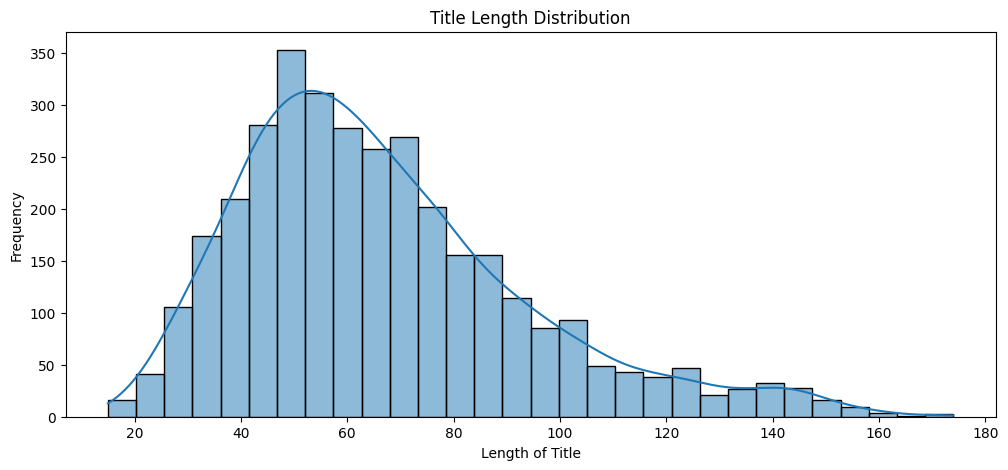

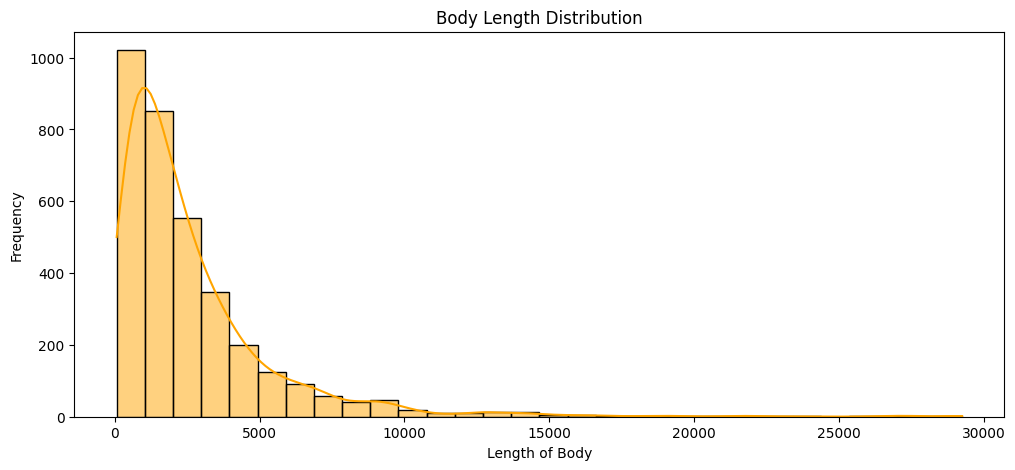

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['title_len'], bins=30, kde=True)
plt.title("Title Length Distribution")
plt.xlabel("Length of Title")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['body_len'], bins=30, kde=True, color='orange')
plt.title("Body Length Distribution")
plt.xlabel("Length of Body")
plt.ylabel("Frequency")
plt.show()

In [ ]:
print("--- Data Exploration Insights for Stack Overflow Question Tagging ---")
print("\nWe have analyzed the collected data to understand its characteristics and inform our modeling approach.")

# 1. Title Length Distribution
print("\nPlot: Title Length Distribution")
print("What it shows: This histogram visualizes how the length of question titles is distributed across our dataset.")
print("Insight for client: We can see that most titles fall within a certain range, indicating typical title lengths for the questions we collected. This helps us understand the input characteristics for title processing.")


# 2. Body Length Distribution
print("\nPlot: Body Length Distribution")
print("What it shows: This histogram shows the distribution of the length of question bodies.")
print("Insight for client: The body lengths are generally much longer and have a wider distribution than titles. This highlights the significant amount of textual information available in the body and its potential importance for accurate tagging.")


--- Data Exploration Insights for Stack Overflow Question Tagging ---

We have analyzed the collected data to understand its characteristics and inform our modeling approach.

Plot: Title Length Distribution
What it shows: This histogram visualizes how the length of question titles is distributed across our dataset.
Insight for client: We can see that most titles fall within a certain range, indicating typical title lengths for the questions we collected. This helps us understand the input characteristics for title processing.

Plot: Body Length Distribution
What it shows: This histogram shows the distribution of the length of question bodies.
Insight for client: The body lengths are generally much longer and have a wider distribution than titles. This highlights the significant amount of textual information available in the body and its potential importance for accurate tagging.


## Number of Tags per Question

In [ ]:
df['tags_list'] = df['tags'].str.split(',')
df['num_tags'] = df['tags_list'].apply(len)

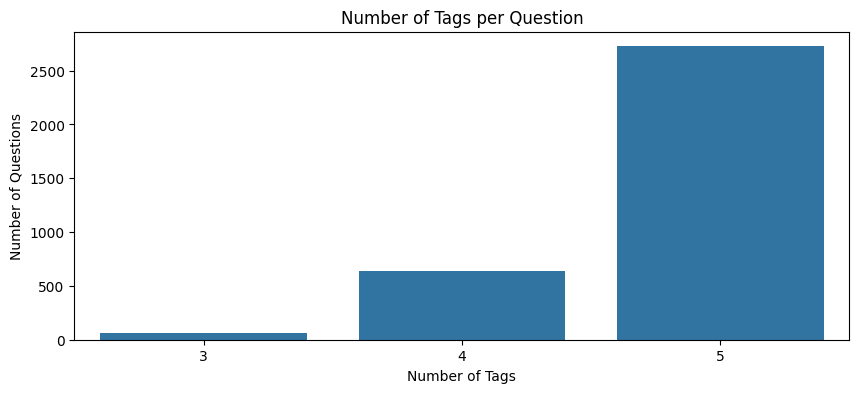

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='num_tags', data=df)
plt.title("Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Number of Questions")
plt.show()

In [ ]:
# 3. Number of Tags per Question
print("\nPlot: Number of Tags per Question")
print("What it shows: This bar plot shows the frequency of questions having a certain number of tags.")
print("Insight for client: It appears that most questions have a small number of tags (e.g., 1 to 3). This gives us an idea of the complexity of the output we need to predict – the model will typically need to predict a few tags per question.")



Plot: Number of Tags per Question
What it shows: This bar plot shows the frequency of questions having a certain number of tags.
Insight for client: It appears that most questions have a small number of tags (e.g., 1 to 3). This gives us an idea of the complexity of the output we need to predict – the model will typically need to predict a few tags per question.


## Most Frequent Tags

In [ ]:
all_tags = [tag for tags in df['tags_list'] for tag in tags]
tag_counts = pd.DataFrame(Counter(all_tags).most_common(20), columns=['Tag', 'Count'])

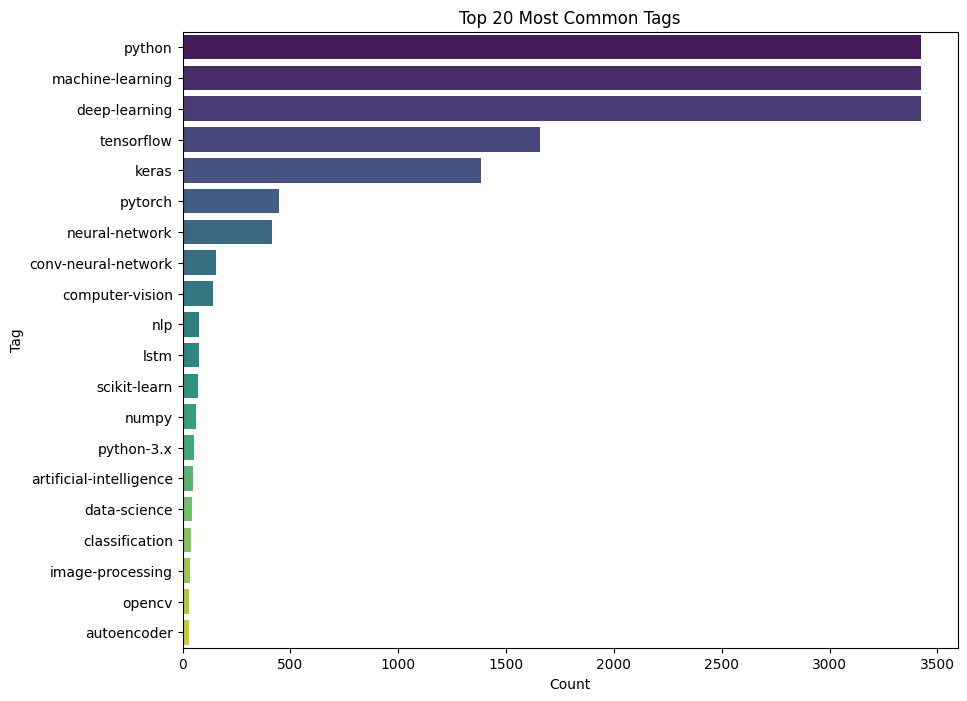

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Tag', data=tag_counts, palette='viridis')
plt.title("Top 20 Most Common Tags")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

In [ ]:
# 4. Top 20 Most Common Tags
print("\nPlot: Top 20 Most Common Tags")
print("What it shows: This bar plot displays the tags that appear most frequently in our dataset.")
print("Insight for client: This plot clearly shows the dominant tags within the scope of our data collection (python, machine-learning, deep-learning, and related sub-topics). These are the tags the model will be most frequently trained to predict. Understanding the most common tags is crucial for evaluating model performance, especially for less frequent tags.")



Plot: Top 20 Most Common Tags
What it shows: This bar plot displays the tags that appear most frequently in our dataset.
Insight for client: This plot clearly shows the dominant tags within the scope of our data collection (python, machine-learning, deep-learning, and related sub-topics). These are the tags the model will be most frequently trained to predict. Understanding the most common tags is crucial for evaluating model performance, especially for less frequent tags.


## Word Cloud for Titles

In [ ]:
title_text = " ".join(df['title'].tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(title_text)

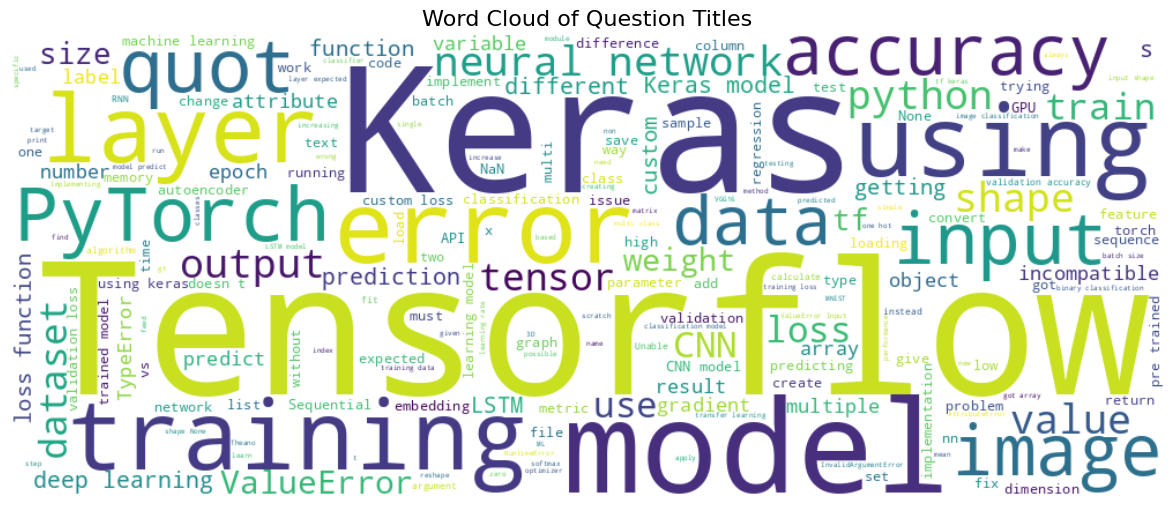

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Titles", fontsize=16)
plt.show()

In [ ]:
# 5. Word Cloud of Question Titles
print("\nPlot: Word Cloud of Question Titles")
print("What it shows: This word cloud visually represents the most frequent words used in question titles, with larger words indicating higher frequency.")
print("Insight for client: The prominent words in this cloud (like 'python', 'error', 'using', 'how', 'get') give us a quick sense of the common topics and types of questions asked. These words are important features for the model to learn from titles.")



Plot: Word Cloud of Question Titles
What it shows: This word cloud visually represents the most frequent words used in question titles, with larger words indicating higher frequency.
Insight for client: The prominent words in this cloud (like 'python', 'error', 'using', 'how', 'get') give us a quick sense of the common topics and types of questions asked. These words are important features for the model to learn from titles.


## Word Cloud for Body

In [ ]:
body_text = " ".join(df['body'].sample(1000).tolist())  # Sample for performance
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(body_text)

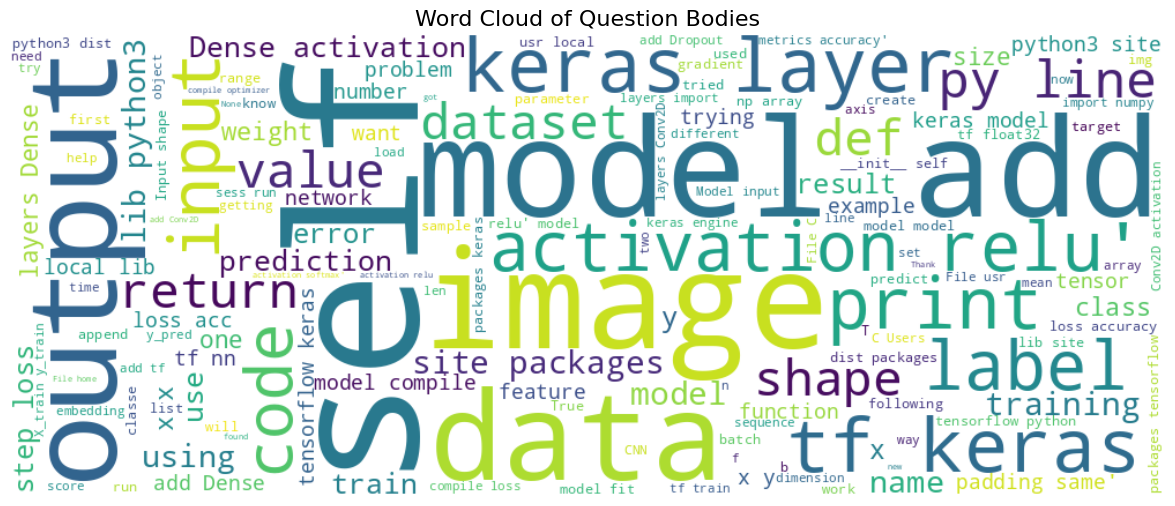

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Question Bodies", fontsize=16)
plt.show()

In [ ]:
# 6. Word Cloud of Question Bodies
print("\nPlot: Word Cloud of Question Bodies")
print("What it shows: Similar to the title word cloud, this shows frequent words in question bodies.")
print("Insight for client: The words here tend to be more technical and descriptive (like 'import', 'code', 'function', 'data', 'model'). This reinforces that the body contains more detailed information and context, which is vital for distinguishing between similar topics and assigning specific tags.")



Plot: Word Cloud of Question Bodies
What it shows: Similar to the title word cloud, this shows frequent words in question bodies.
Insight for client: The words here tend to be more technical and descriptive (like 'import', 'code', 'function', 'data', 'model'). This reinforces that the body contains more detailed information and context, which is vital for distinguishing between similar topics and assigning specific tags.


## Tags vs. Title/Body Length

In [ ]:
df['title_len'] = df['title'].str.len()
df['body_len'] = df['body'].str.len()
df['tags_list'] = df['tags'].str.split(',')
df['num_tags'] = df['tags_list'].apply(len)

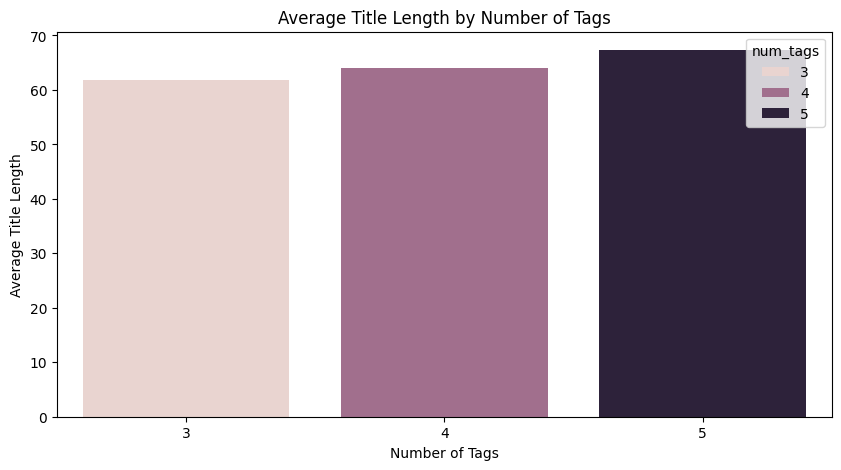

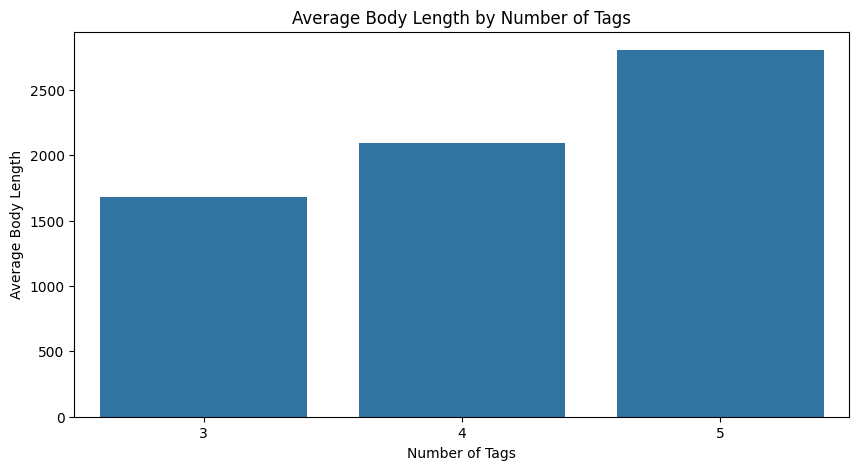

In [ ]:
title_avg = df.groupby('num_tags')['title_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='title_len', data=title_avg,hue ='num_tags' )
plt.title("Average Title Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Title Length")
plt.show()

body_avg = df.groupby('num_tags')['body_len'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='num_tags', y='body_len', data=body_avg )
plt.title("Average Body Length by Number of Tags")
plt.xlabel("Number of Tags")
plt.ylabel("Average Body Length")
plt.show()

In [ ]:
# 7. Average Title Length by Number of Tags
print("\nPlot: Average Title Length by Number of Tags")
print("What it shows: This bar plot shows the average length of titles for questions with a different number of assigned tags.")
print("Insight for client: There isn't a strong visual trend here, suggesting that the number of tags a question has doesn't heavily influence how long its title is, on average.")

# 8. Average Body Length by Number of Tags
print("\nPlot: Average Body Length by Number of Tags")
print("What it shows: This bar plot shows the average length of question bodies for questions with a different number of assigned tags.")
print("Insight for client: Similar to titles, there isn't a clear strong correlation here either. While we might intuitively expect questions with more tags to be more complex and perhaps longer, this plot suggests the average body length doesn't strictly increase with the number of tags in this dataset.")



Plot: Average Title Length by Number of Tags
What it shows: This bar plot shows the average length of titles for questions with a different number of assigned tags.
Insight for client: There isn't a strong visual trend here, suggesting that the number of tags a question has doesn't heavily influence how long its title is, on average.

Plot: Average Body Length by Number of Tags
What it shows: This bar plot shows the average length of question bodies for questions with a different number of assigned tags.
Insight for client: Similar to titles, there isn't a clear strong correlation here either. While we might intuitively expect questions with more tags to be more complex and perhaps longer, this plot suggests the average body length doesn't strictly increase with the number of tags in this dataset.


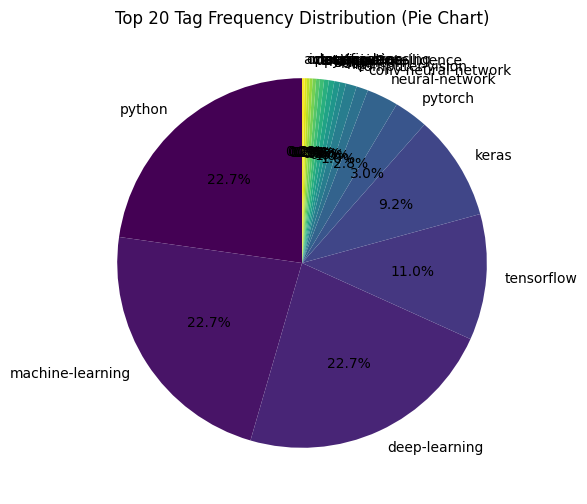

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Tag Frequency Distribution
plt.figure(figsize=(10, 6))
tag_counts.set_index('Tag')['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title("Top 20 Tag Frequency Distribution (Pie Chart)")
plt.ylabel("") # Hide the default y-label
plt.show()

In [ ]:
# 9. Top 20 Tag Frequency Distribution (Pie Chart)
print("\nPlot: Top 20 Tag Frequency Distribution (Pie Chart)")
print("What it shows: This pie chart illustrates the relative proportion of the top 20 most common tags.")
print("Insight for client: This provides a clear visual of the class imbalance among the most frequent tags. Some tags are significantly more common than others, which is a factor we need to consider when training and evaluating the model (e.g., ensuring the model performs well on less frequent tags too).")



Plot: Top 20 Tag Frequency Distribution (Pie Chart)
What it shows: This pie chart illustrates the relative proportion of the top 20 most common tags.
Insight for client: This provides a clear visual of the class imbalance among the most frequent tags. Some tags are significantly more common than others, which is a factor we need to consider when training and evaluating the model (e.g., ensuring the model performs well on less frequent tags too).


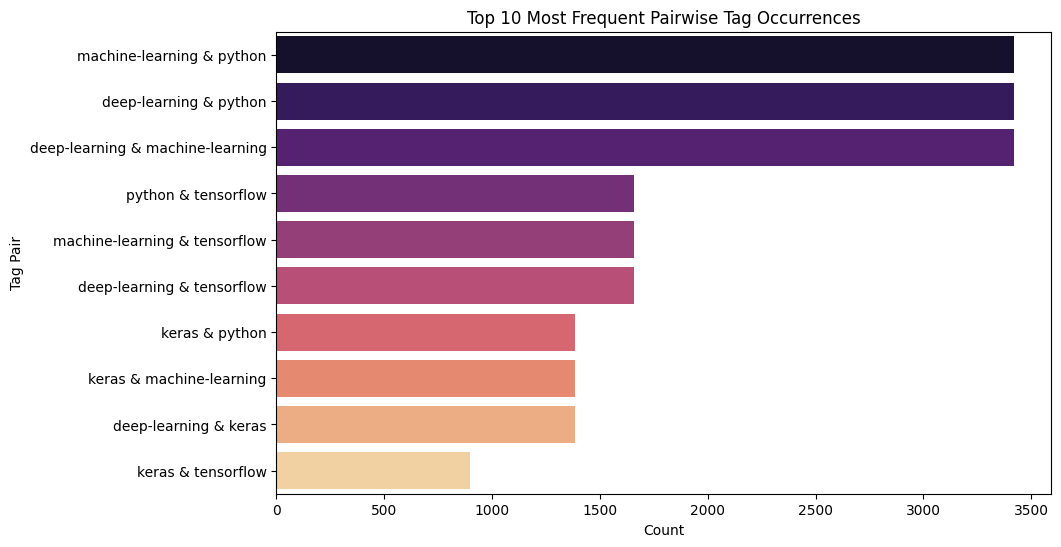

In [ ]:
tag_pairs = Counter()
for tags in df['tags_list']:
    for i in range(len(tags)):
        for j in range(i + 1, len(tags)):
            pair = tuple(sorted([tags[i], tags[j]]))
            tag_pairs[pair] += 1

top_tag_pairs = pd.DataFrame(tag_pairs.most_common(10), columns=['Pair', 'Count'])
top_tag_pairs['Pair'] = top_tag_pairs['Pair'].apply(lambda x: f"{x[0]} & {x[1]}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Pair', data=top_tag_pairs, palette='magma')
plt.title("Top 10 Most Frequent Pairwise Tag Occurrences")
plt.xlabel("Count")
plt.ylabel("Tag Pair")
plt.show()

In [ ]:
# 10. Top 10 Most Frequent Pairwise Tag Occurrences
print("\nPlot: Top 10 Most Frequent Pairwise Tag Occurrences")
print("What it shows: This bar plot highlights the pairs of tags that most frequently appear together on the same question.")
print("Insight for client: This is important for understanding tag co-occurrence. Tags like 'python' and 'machine-learning' frequently appear together. This information can potentially be leveraged by the model to improve prediction accuracy – if 'python' is predicted, the model might also be more likely to predict 'machine-learning'.")



Plot: Top 10 Most Frequent Pairwise Tag Occurrences
What it shows: This bar plot highlights the pairs of tags that most frequently appear together on the same question.
Insight for client: This is important for understanding tag co-occurrence. Tags like 'python' and 'machine-learning' frequently appear together. This information can potentially be leveraged by the model to improve prediction accuracy – if 'python' is predicted, the model might also be more likely to predict 'machine-learning'.


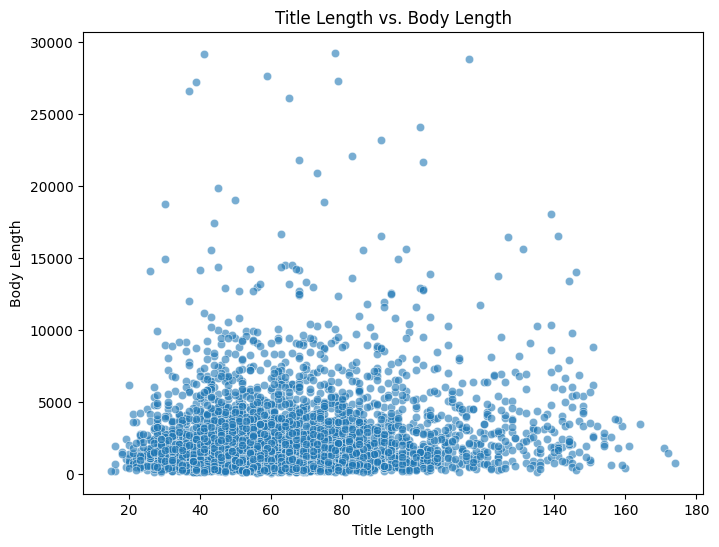

In [ ]:
# Correlation between Title and Body Length
plt.figure(figsize=(8, 6))
sns.scatterplot(x='title_len', y='body_len', data=df, alpha=0.6)
plt.title("Title Length vs. Body Length")
plt.xlabel("Title Length")
plt.ylabel("Body Length")
plt.show()

In [ ]:
# 11. Correlation between Title and Body Length
print("\nPlot: Title Length vs. Body Length (Scatter Plot)")
print("What it shows: This scatter plot visualizes the relationship between the length of the title and the length of the body for each question.")
print("Insight for client: There appears to be a weak positive correlation. Longer titles *tend* to be associated with longer bodies, but there's a wide spread, indicating that title length isn't a strong predictor of body length. The model will need to process both independently for the most comprehensive understanding.")



Plot: Title Length vs. Body Length (Scatter Plot)
What it shows: This scatter plot visualizes the relationship between the length of the title and the length of the body for each question.
Insight for client: There appears to be a weak positive correlation. Longer titles *tend* to be associated with longer bodies, but there's a wide spread, indicating that title length isn't a strong predictor of body length. The model will need to process both independently for the most comprehensive understanding.


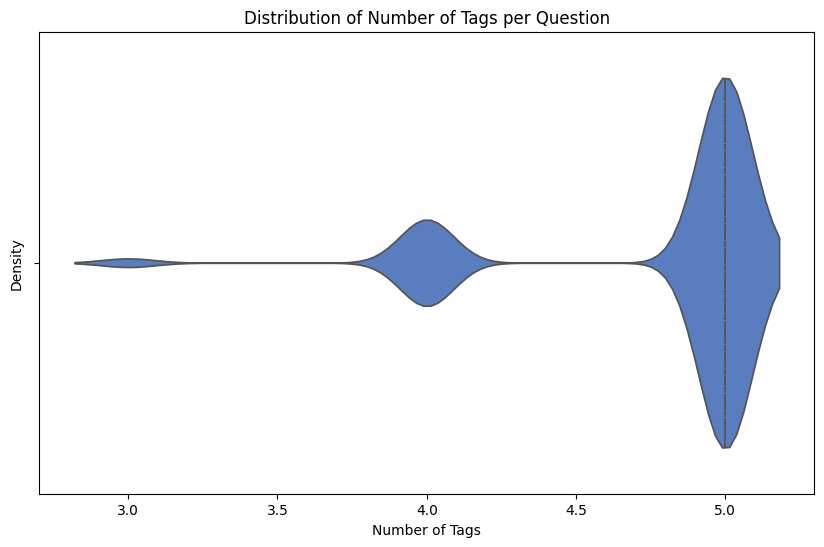

In [ ]:
# Distribution of Number of Tags per Question (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_tags', data=df, inner='quartile', palette='muted')
plt.title("Distribution of Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Density")
plt.show()

In [ ]:
# 12. Distribution of Number of Tags per Question (Violin Plot)
print("\nPlot: Distribution of Number of Tags per Question (Violin Plot)")
print("What it shows: This violin plot shows the distribution of the number of tags per question, providing more detail than the simple count plot by showing the density at different tag counts.")
print("Insight for client: It reinforces that the vast majority of questions have 1, 2, or 3 tags. The shape of the 'violin' for each number of tags gives a visual sense of how the data is clustered.")



Plot: Distribution of Number of Tags per Question (Violin Plot)
What it shows: This violin plot shows the distribution of the number of tags per question, providing more detail than the simple count plot by showing the density at different tag counts.
Insight for client: It reinforces that the vast majority of questions have 1, 2, or 3 tags. The shape of the 'violin' for each number of tags gives a visual sense of how the data is clustered.


In [ ]:
print("\nOverall Takeaways:")
print("- The dataset contains questions with varying lengths of titles and bodies, both contributing valuable information.")
print("- There's a significant imbalance in tag frequency, with a few tags being much more common than others.")
print("- Certain tags frequently appear together, suggesting potential relationships between topics.")
print("- The number of tags per question is typically small (1-3).")
print("\nThese insights guide our data preprocessing steps and the selection of appropriate modeling techniques for multi-label classification.")



Overall Takeaways:
- The dataset contains questions with varying lengths of titles and bodies, both contributing valuable information.
- There's a significant imbalance in tag frequency, with a few tags being much more common than others.
- Certain tags frequently appear together, suggesting potential relationships between topics.
- The number of tags per question is typically small (1-3).

These insights guide our data preprocessing steps and the selection of appropriate modeling techniques for multi-label classification.


# Data Preprocessing

## Preprocessing of Data (i.e removing stopwords ,tags,urls etc.,)

In [ ]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
def pre_proce(data,coln,case="lower",tags=True,urls=True,emails=True,mentions=True,digits=True,dates=True,emojii=True,contractionsss=True,stopwordss=True,infl="stem",stemms="porter",punch=True):
    import re
    import emoji
    import contractions
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer
    ps=PorterStemmer()
    ls=LancasterStemmer()
    ss=SnowballStemmer(language="english")
    wl=WordNetLemmatizer()

    #stopwords creation
    stp=stopwords.words("english")
    stp.remove("not")

    acro={"gm":"good morning","gn":"good night","omg":"o my god"}

    #emoji
    if emojii==True:
        data[coln]=data[coln].apply(lambda x:emoji.demojize(x,delimiters=('', '')))
    else:
        pass

    # case
    if case=="lower":
        data[coln]=data[coln].str.lower()
    elif case=="upper":
        data[coln]=data[coln].str.upper()
    else:
        pass

    #tags
    if tags==True:
        data[coln]=data[coln].apply(lambda x:re.sub("<.*?>"," ",x))
    else:
        pass

    #urls
    if urls==True:
        data[coln]=data[coln].apply(lambda x:re.sub("https?://\S+"," ",x))
    else:
        pass

    #emails
    if emails==True:
        data[coln]=data[coln].apply(lambda x:re.sub("\S+@\S+"," ",x))
    else:
        pass

    #mentions
    if mentions==True:
        data[coln]=data[coln].apply(lambda x:re.sub("\B[@#]\S+"," ",x))
    else:
        pass

    #digits
    if digits==True:
        data[coln]=data[coln].apply(lambda x:re.sub("\d"," ",x))
    else:
        pass

    #dates
    if dates==True:
        data[coln]=data[coln].apply(lambda x:re.sub(r"\b[0-9]{4}\/[0-9]{1,2}\/[0-9]{1,2}\b"," ",x))
        data[coln]=data[coln].apply(lambda x:re.sub(r"\b[0-9]{1,2}\/[0-9]{1,2}\/[0-9]{4}\b"," ",x))
    else:
        pass

    #contractionsss
    if contractionsss==True:
        data[coln]=data[coln].apply(lambda x:contractions.fix(x))
    else:
        pass

    #stopwordss
    if stopwordss==True:
        l2=[]
        for doc in data[coln]:# looping through documents
            l1=[]
            for word in word_tokenize(doc): # looping throug words
                if word not in stp:# checking word is present in stp
                    l1.append(word)
                else:
                    pass

            l2.append([" ".join(l1)])
        data[coln]=pd.DataFrame(l2)
    else:
        pass

    # stemming and lemmatization
    if infl=="stem":
        l3=[]
        for doc in data[coln]:
            l4=[]
            for word in word_tokenize(doc):
                if stemms=="porter":
                    l4.append(ps.stem(word))
                elif stemms=="snow":
                    l4.append(ss.stem(word))
                elif stemms=="lanc":
                    l4.append(ls.stem(word))
            l3.append([" ".join(l4)])
        data[coln]=pd.DataFrame(l3)

    elif infl=="lemma":
        l5=[]
        for doc in data[coln]:
            l6=[]
            for word in word_tokenize(doc):
                l6.append(wl.lemmatize(word))
            l5.append([" ".join(l6)])

        data[coln]=pd.DataFrame(l5)

    # punc

    if punch==True:
        data[coln]=data[coln].apply(lambda x:re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'," ",x))
    else:
        pass

    return data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
datac = pre_proce(datac,"title")

In [ ]:
datac

,title,body,tags
0,print model summari pytorch,How do I print the summary of a model in PyTor...,"python,machine-learning,deep-learning,pytorch"
1,model ev pytorch,When should I use .eval()? I understand it is ...,"python,machine-learning,deep-learning,pytorch"
2,initi weight pytorch,How do I initialize weights and biases of a ne...,"python,machine-learning,deep-learning,neural-n..."
3,model train pytorch,Does it call forward() in nn.Module? I thought...,"python,machine-learning,deep-learning,pytorch"
4,runtimeerror input type torch floattensor ...,"This:\ndevice = torch.device(""cuda"" if torch.c...","python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,python librari api deep learn,I need to do some deep learning work in python...,"python,machine-learning,tensorflow,deep-learning"
3418,error assert fail ssize empti ...,I am getting the error:\nTraceback (most recen...,"python,opencv,machine-learning,deep-learning,a..."
3419,lead overfit curs dimension,Dataset contains :\n15000 Observations/Rows\n3...,"python,machine-learning,deep-learning,dataset,..."
3420,predict household water consumpt,I have data related to the household water con...,"python,machine-learning,deep-learning"


In [ ]:
datac = pre_proce(datac,"body")

In [ ]:
datac

,title,body,tags
0,print model summari pytorch,print summari model pytorch like model summari...,"python,machine-learning,deep-learning,pytorch"
1,model ev pytorch,use eval understand suppos allow eva...,"python,machine-learning,deep-learning,pytorch"
2,initi weight pytorch,initi weight bias network via e g xavier i...,"python,machine-learning,deep-learning,neural-n..."
3,model train pytorch,call forward nn modul thought call model...,"python,machine-learning,deep-learning,pytorch"
4,runtimeerror input type torch floattensor ...,devic torch devic cuda torch cuda ...,"python,python-3.x,machine-learning,deep-learni..."
...,...,...,...
3417,python librari api deep learn,need deep learn work python mainli imag proc...,"python,machine-learning,tensorflow,deep-learning"
3418,error assert fail ssize empti ...,get error traceback recent call last f...,"python,opencv,machine-learning,deep-learning,a..."
3419,lead overfit curs dimension,dataset contain observations row features co...,"python,machine-learning,deep-learning,dataset,..."
3420,predict household water consumpt,data relat household water consumpt key issu...,"python,machine-learning,deep-learning"


In [ ]:
datac["tags"] = datac["tags"].apply(lambda x : x.split())

In [ ]:
datac

,title,body,tags
0,print model summari pytorch,print summari model pytorch like model summari...,"[python,machine-learning,deep-learning,pytorch]"
1,model ev pytorch,use eval understand suppos allow eva...,"[python,machine-learning,deep-learning,pytorch]"
2,initi weight pytorch,initi weight bias network via e g xavier i...,"[python,machine-learning,deep-learning,neural-..."
3,model train pytorch,call forward nn modul thought call model...,"[python,machine-learning,deep-learning,pytorch]"
4,runtimeerror input type torch floattensor ...,devic torch devic cuda torch cuda ...,"[python,python-3.x,machine-learning,deep-learn..."
...,...,...,...
3417,python librari api deep learn,need deep learn work python mainli imag proc...,"[python,machine-learning,tensorflow,deep-learn..."
3418,error assert fail ssize empti ...,get error traceback recent call last f...,"[python,opencv,machine-learning,deep-learning,..."
3419,lead overfit curs dimension,dataset contain observations row features co...,"[python,machine-learning,deep-learning,dataset..."
3420,predict household water consumpt,data relat household water consumpt key issu...,"[python,machine-learning,deep-learning]"


In [ ]:
datac["tags"] = datac["tags"].apply(lambda x : [item.strip(",") for item in x])

In [ ]:
datac

,title,body,tags
0,print model summari pytorch,print summari model pytorch like model summari...,"[python,machine-learning,deep-learning,pytorch]"
1,model ev pytorch,use eval understand suppos allow eva...,"[python,machine-learning,deep-learning,pytorch]"
2,initi weight pytorch,initi weight bias network via e g xavier i...,"[python,machine-learning,deep-learning,neural-..."
3,model train pytorch,call forward nn modul thought call model...,"[python,machine-learning,deep-learning,pytorch]"
4,runtimeerror input type torch floattensor ...,devic torch devic cuda torch cuda ...,"[python,python-3.x,machine-learning,deep-learn..."
...,...,...,...
3417,python librari api deep learn,need deep learn work python mainli imag proc...,"[python,machine-learning,tensorflow,deep-learn..."
3418,error assert fail ssize empti ...,get error traceback recent call last f...,"[python,opencv,machine-learning,deep-learning,..."
3419,lead overfit curs dimension,dataset contain observations row features co...,"[python,machine-learning,deep-learning,dataset..."
3420,predict household water consumpt,data relat household water consumpt key issu...,"[python,machine-learning,deep-learning]"


## Numerical Representation of Features and Class Lables

In [ ]:

datac['combined_text'] = datac['title'] + ' ' + datac['body']


X = datac['combined_text']
y = datac['tags']

In [ ]:

# Split into train and test
X_train_text, X_test_text, y_train_labels, y_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report





In [ ]:
tfidf = TfidfVectorizer()
X_vec = tfidf.fit_transform(X_train_text)

In [ ]:
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y_train_labels)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)


In [ ]:
model.fit(X_vec, y_bin)

MLPClassifier(max_iter=1000)

In [ ]:
y_pred = model.predict(X_vec)

In [ ]:
subset_acc = f1_score(y_bin, y_pred, average="micro")
subset_acc

1.0

In [ ]:
import pickle


with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("mlb.pkl", "wb") as f:
    pickle.dump(mlb, f)